# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution. In the whole population.

- Plot amplitude vs period with labels. The mean period and the mean amplitude. 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map. 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal on the selected cells. 



Missing gaps. Cleaning up. 
Distances between peaks.

In [159]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks,peak_widths
from scipy.spatial.distance import pdist

data = sio.loadmat('./task1.mat')
x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape
time.shape


(101, 1)

## Plot (with labels) example cell tracetories

Text(0, 0.5, 'fluorescence')

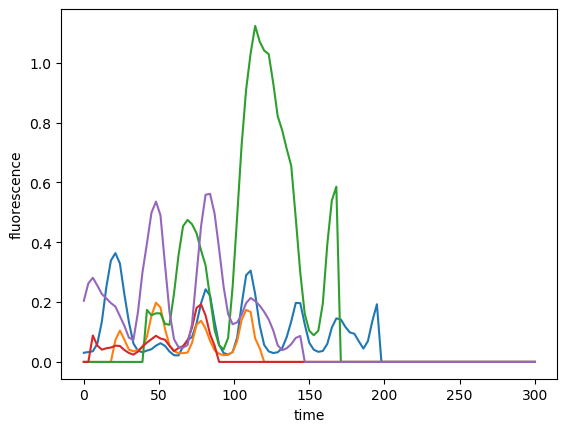

In [160]:
#select 5 random trajectories and plot it
plotter.style.use('default')
indices = np.random.choice(x.shape[1],5, replace=False)
plotter.plot(time,x[:,indices])
plotter.xlabel('time')
plotter.ylabel('fluorescence')

## Find peaks in each trajectories using scipy library functions and calculate amplitude and period of oscillations

In [161]:
peak_ind,period_avg, amp_avg = [],[],[]

for cell in x.T:
    pind=list(find_peaks(cell, distance=6)[0])
    peak_ind += [list(pind)]
    if len(pind) > 1:
        period_avg += [np.mean(np.diff(time[pind].T))]
        amp_avg += [np.mean(cell[pind])]
    else:
        period_avg += [np.nan]
        amp_avg += [np.nan]

    
#TRANSFORM MISSING VALUES to 0
#period_avg = np.nan_to_num(np.array(period_avg))
#amp_avg = np.nan_to_num(np.array(amp_avg))



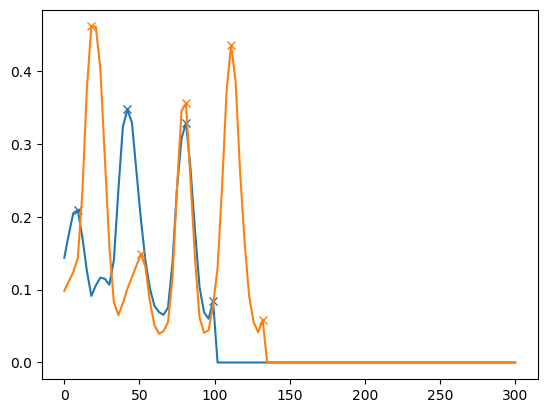

In [162]:
plotter.style.use('default')
#PLOTTING PEAKS (of the two first trajectories)
ax = plotter.gca() #put the same color in
for i in range(0,x.shape[1]-499):
    color=next(ax._get_lines.prop_cycler)['color']
    plotter.plot(time,x[:,i], color=color)
    plotter.plot(time[peak_ind[i]],x[:,i][peak_ind[i]], 'x',color=color)



## Draw histograms of period distribution

Text(0.5, 0, 'Period')

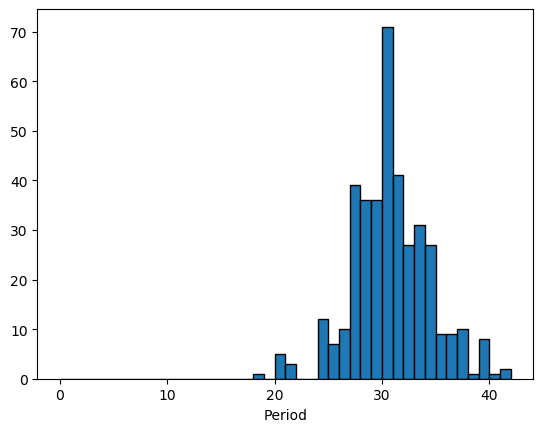

In [163]:
plotter.hist(period_avg, bins=range(0,int(max(period_avg))+1,1), edgecolor='black')
plotter.xlabel('Period')

## Plot amplitude vs period with labels

Text(0, 0.5, 'Amplitude')

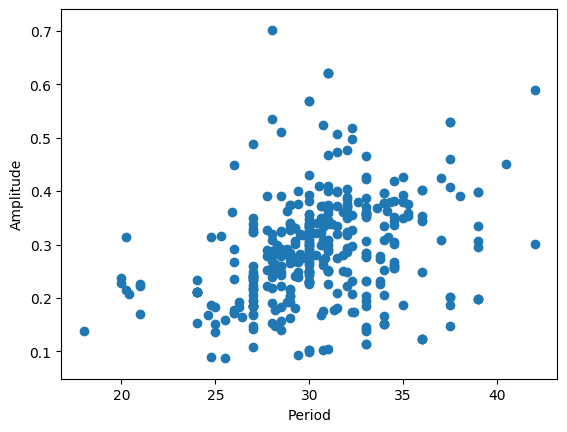

In [164]:
plotter.scatter(period_avg,amp_avg, cmap='viridis')
plotter.xlabel('Period')
plotter.ylabel('Amplitude')


## Select ten cell trajectiories with the smallest periods and plot those as a heat map.

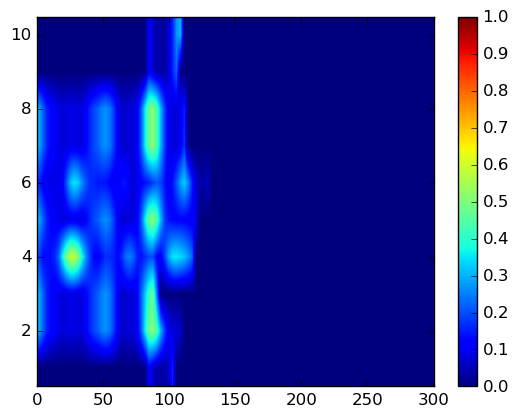

In [165]:
# Select ten cell trajectiories with the smallest periods
period_sort =  np.sort(period_avg)
ind_smallest = np.argsort(period_avg)[:10]
smallest = x[:,ind_smallest]

#HEATMAP
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(smallest.T, aspect='auto',origin='lower',
           cmap='jet', extent=[0, 300, 0.5, 11-0.5])

plotter.colorbar()
plotter.clim(0,1)



Text(0, 0.5, 'fluorescence')

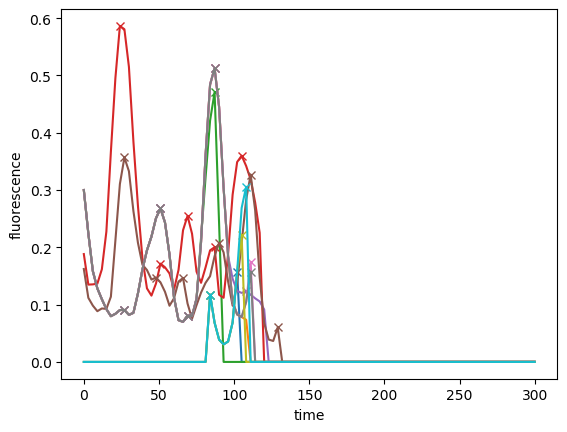

In [166]:
#PLOTTING PEAKS (of the two first trajectories)
plotter.style.use('default')
ax = plotter.gca() #put the same color 
for i in range(0,smallest.shape[1]):
    color=next(ax._get_lines.prop_cycler)['color']
    plotter.plot(time,x[:,ind_smallest[i]], color=color)
    plotter.plot(time[peak_ind[ind_smallest[i]]],x[:,ind_smallest[i]][peak_ind[ind_smallest[i]]], 'x',color=color)
plotter.xlabel('time')
plotter.ylabel('fluorescence')



## Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal on the selected cells.

Text(0, 0.5, 'Power(signal)')

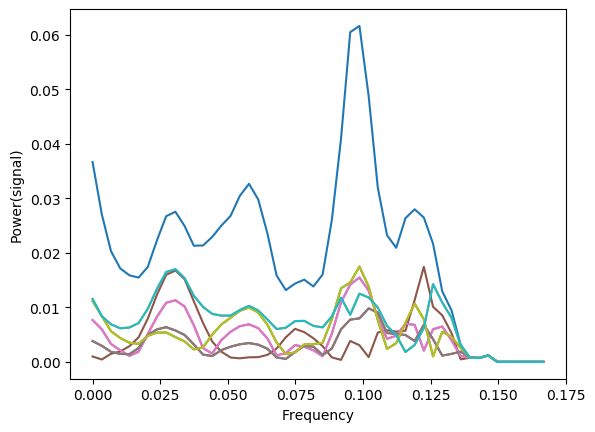

In [167]:
plotter.style.use('default')
#10 SMALLEST TRAJECTORIES
from scipy.fftpack import fft

# Number of sample points
N = 101
# sample spacing
T = 3

yf = fft(smallest)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.plot(xf,2.0/N * np.abs(yf[0:N//2]))
plotter.xlabel('Frequency')
plotter.ylabel('Power(signal)')



The dominant frecuency is 0.100. 